In [1]:
# import packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import sys
import seaborn as sns
import scipy as sp
%matplotlib inline

# import pre-processing modules 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel 

# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# import evaluation modules
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [70]:
test_set = pd.read_csv(r"C:/Users/Yehonatan/PycharmProject/DS/projects/titanic/test.csv")
train_set = pd.read_csv(r"C:/Users/Yehonatan/PycharmProject/DS/projects/titanic/train.csv")
df_original = pd.concat([train_set,test_set], axis=0)


In [151]:
df_train = (train_set.copy()).rename(columns=str.lower)
df_test = (test_set.copy()).rename(columns=str.lower)
df = (df_original.copy()).rename(columns=str.lower)


df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [242]:

#print(df['cabin'][:20] )
#print(df.iloc[339,:])
print(df.iloc[172,:])
print(df.iloc[302,:])
print(df.iloc[597,:])
print(df.iloc[719,:])
print(df.iloc[869,:])



#print(df.iloc[7,:])
#print(df.iloc[24,:])
#print(df.iloc[374,:])
#print(df.iloc[567,:])
#print(df.iloc[1280,:])


passengerid                             173
survived                                1.0
pclass                                    3
name           Johnson, Miss. Eleanor Ileen
sex                                  female
age                                     1.0
sibsp                                     1
parch                                     1
ticket                               347742
fare                                11.1333
cabin                                   NaN
embarked                                  S
Name: 172, dtype: object
passengerid                                303
survived                                   0.0
pclass                                       3
name           Johnson, Mr. William Cahoone Jr
sex                                       male
age                                       19.0
sibsp                                        0
parch                                        0
ticket                                    LINE
fare                    

In [254]:
johnston = df_train[df_train["ticket"] == '1601']
johnston

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [150]:
# find index by names 
names = list(df['name'])
#print(names)
fam_name = [(item.split(',')[0]) for item in names]
#print(fam_name)
for i in range(len(fam_name)):
    if fam_name[i] == 'Blackwell':
        continue
        #print(i)    

In [240]:
df_cabin = df_train.sort_values(by=['cabin'],ascending=True)
df_cabin.head(204)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
...,...,...,...,...,...,...,...,...,...,...,...,...
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S


In [219]:
df_live = df_train[df_train["survived"] == 1]
df_live.head(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [235]:
df_nan = df_train[df_train['age'].isna()]
df_nan.info()
df_nan.sort_values(by=['sex'],ascending=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  177 non-null    int64  
 1   survived     177 non-null    int64  
 2   pclass       177 non-null    int64  
 3   name         177 non-null    object 
 4   sex          177 non-null    object 
 5   age          0 non-null      float64
 6   sibsp        177 non-null    int64  
 7   parch        177 non-null    int64  
 8   ticket       177 non-null    object 
 9   fare         177 non-null    float64
 10  cabin        19 non-null     object 
 11  embarked     177 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.0+ KB


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C


In [236]:
df_male = df_train[df_train['sex'] == 'female']
df_young = df_male[df_male["age"] <15 ]
#df_young.sort_values(by=['age'],ascending=True)


In [157]:
#sns.barplot(data=df_train, x="survived", y="pclass",  errorbar="sd")
 #sns.barplot(x="pclass", y="age", hue="survived", data=df_train)

## class plot

<AxesSubplot: xlabel='pclass', ylabel='count'>

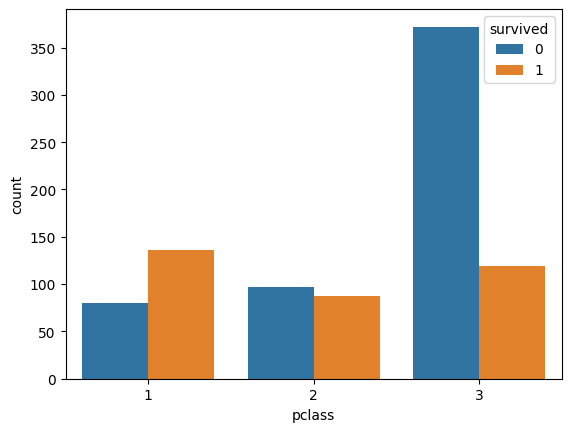

In [156]:
sns.countplot(data=df_train, x="pclass", hue="survived")

## fare plot

<AxesSubplot: xlabel='survived', ylabel='count'>

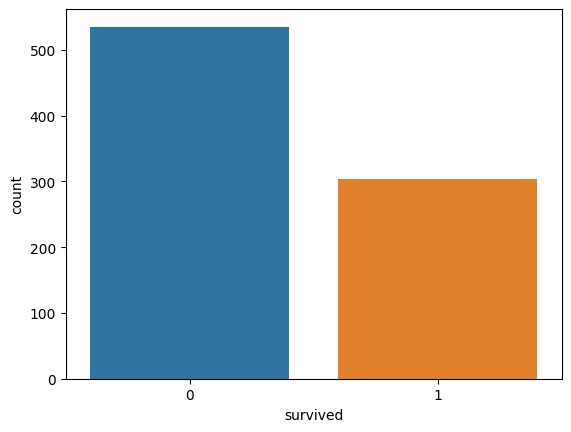

In [181]:
# I want to look who survived for fare greater than 100 
fare_100 = df_train[df_train["fare"] < 100]
sns.countplot(data=fare_100, x="survived")


<AxesSubplot: xlabel='fare', ylabel='Count'>

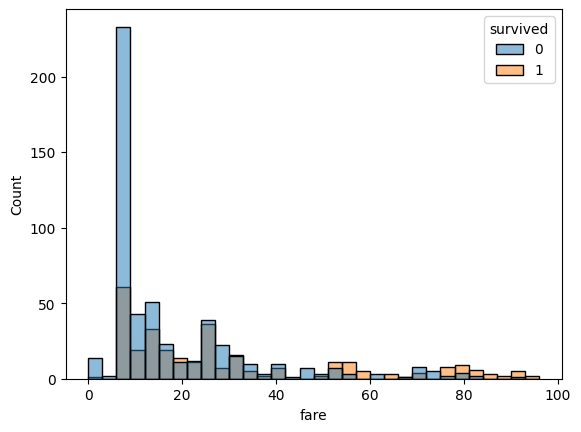

In [198]:
sns.histplot(data=fare_100, x="fare", binwidth=3, hue='survived')

## age plot

<AxesSubplot: xlabel='age', ylabel='Count'>

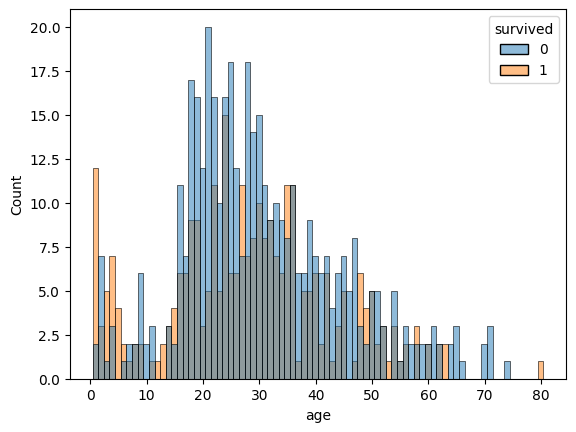

In [199]:
sns.histplot(data=df_train, x="age", binwidth=1, hue='survived')

<AxesSubplot: xlabel='survived', ylabel='age'>

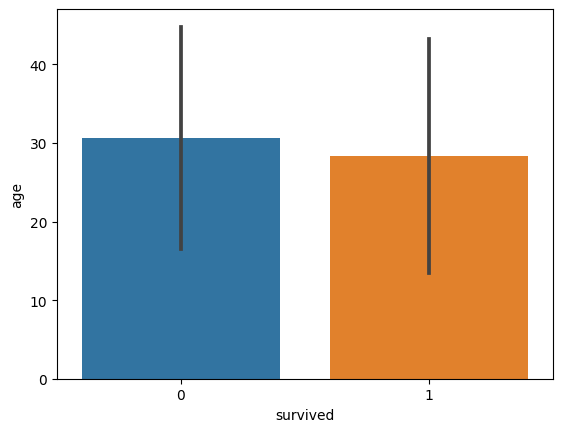

In [201]:
sns.barplot(data=df_train, x='survived', y='age', errorbar="sd")

## sex plot 

<AxesSubplot: xlabel='sex', ylabel='count'>

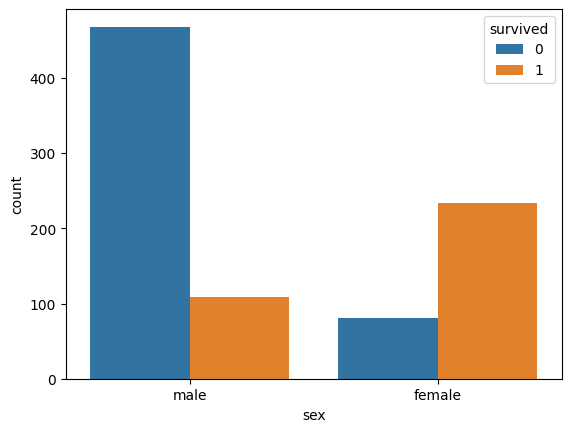

In [202]:
sns.countplot(data=df_train, x="sex", hue='survived')